# EDA

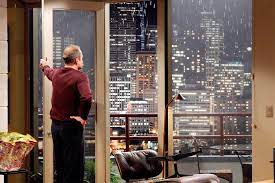

In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load the dataset
file_path = "data/_select_from_king_county_house_details_kchd_inner_join_king_coun_202307111055.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [108]:
df = df.drop(['house_id', 'id.1'], axis=1)

In [109]:
# Data overview

# Checking the size of the dataset
print("Shape of the dataset: ", df.shape)

# Checking the dataset's info
df.info()


Shape of the dataset:  (21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  

In [110]:
# Getting descriptive statistics of the dataset
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [111]:
#Data cleaning

#Check for duplicates of data
print(f'Number of Duplicate Rows : {df.duplicated().sum()}')

Number of Duplicate Rows : 0


In [112]:
# Checking the number of missing values in each column
print(f'Total number of missing values: \n{df.isnull().sum()}')

Total number of missing values: 
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64


In [113]:
# Understand waterfront numberic description
df.waterfront.unique()

array([nan,  0.,  1.])

In [114]:
# There are 2 unique values for waterfront. Lets assume they mean "near waterfront" 
# & "not near waterfront". I will therefore set the NaNs to value 2 meaning "Unknown"

df['waterfront'].fillna(2, inplace=True)
df.waterfront.unique()

array([2., 0., 1.])

In [115]:
df['view'].unique()


array([ 0., nan,  3.,  4.,  2.,  1.])

In [116]:
# Drop view column (assuming not relevant to customer)

df = df.drop('view', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21145 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17749 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  float64
 17  sqft_lot15     21597 non-null  float64
 18  date  

In [117]:
# Fill missing values for 'sqft_basement' with 0 (assuming no basement)
df['sqft_basement'].fillna(0, inplace=True)

# Fill missing values for 'yr_renovated' with 0 (assuming no renovation)
df['yr_renovated'].fillna(0, inplace=True)

# Checking the number of missing values in each column after filling
df.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

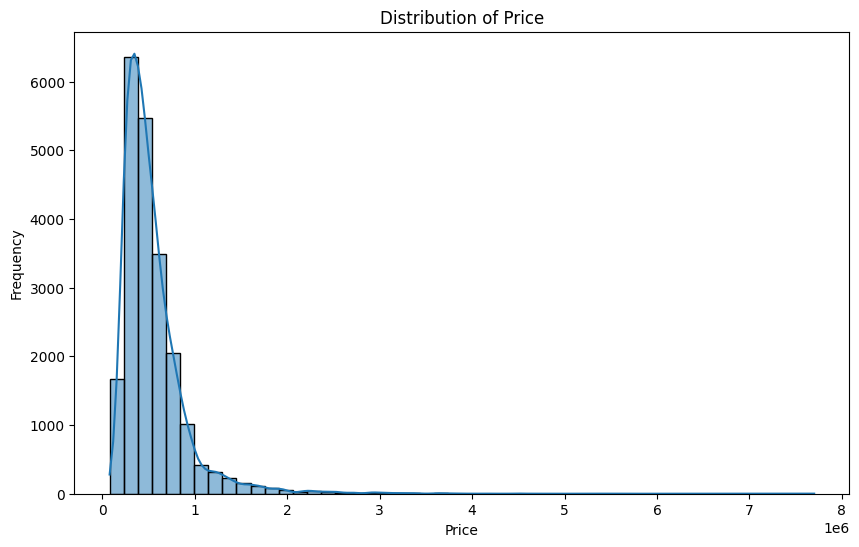

In [118]:
# Step 6: Exploratory Data Analysis

# Plotting a histogram for the 'price' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [119]:
df = df.drop('date', axis=1)

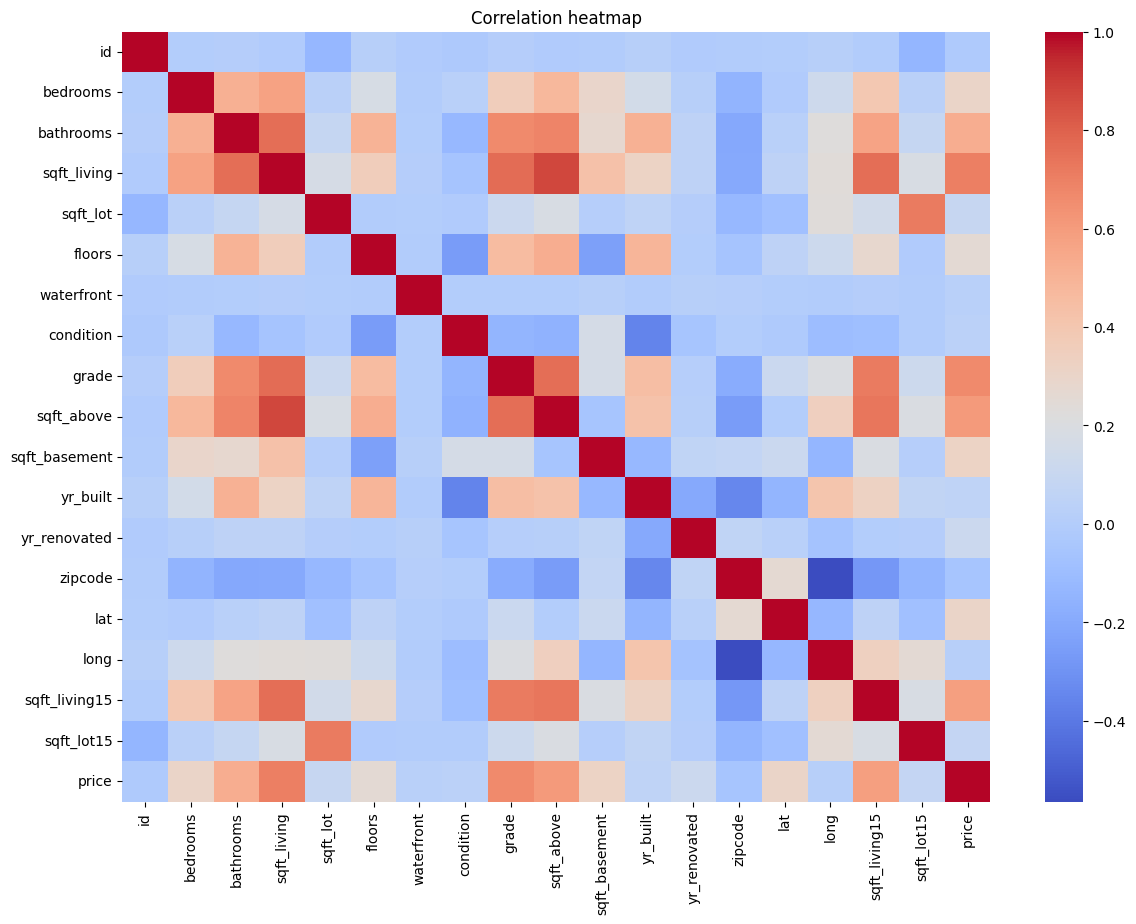

In [120]:
# Calculating the correlation matrix
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

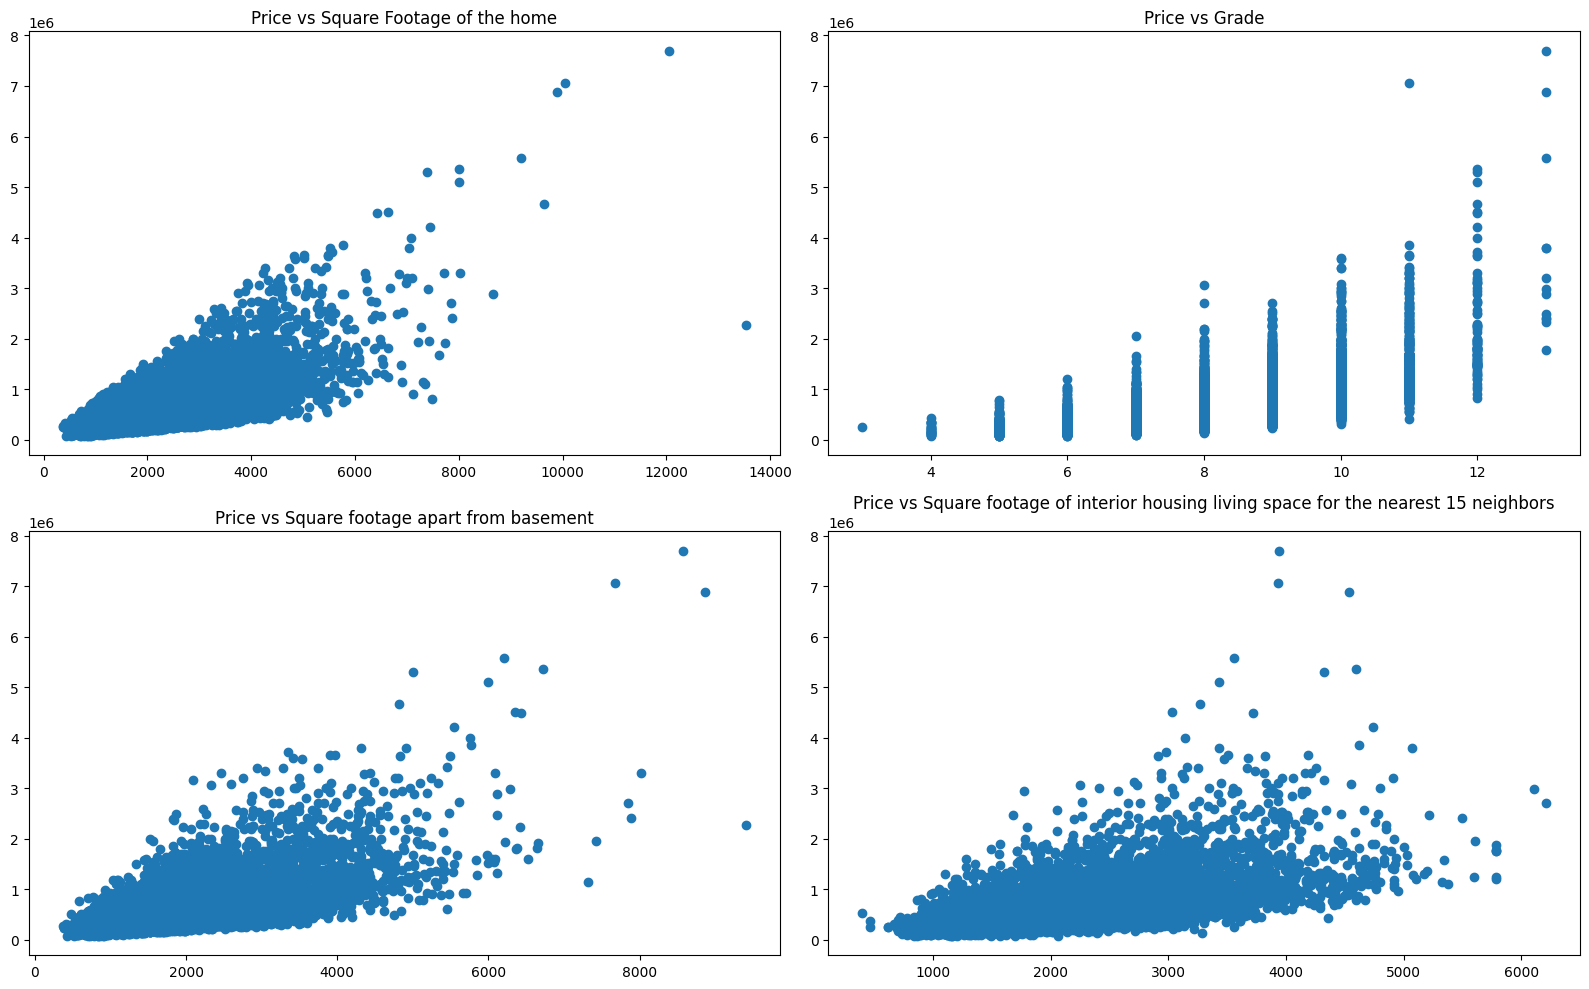

In [121]:
# Plotting scatter plots for 'price' vs 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15'

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Price vs Square Footage of the home
axs[0, 0].scatter(df['sqft_living'], df['price'])
axs[0, 0].set_title('Price vs Square Footage of the home')

# Price vs Grade
axs[0, 1].scatter(df['grade'], df['price'])
axs[0, 1].set_title('Price vs Grade')

# Price vs Square footage apart from basement
axs[1, 0].scatter(df['sqft_above'], df['price'])
axs[1, 0].set_title('Price vs Square footage apart from basement')

# Price vs Square footage of interior housing living space for the nearest 15 neighbors
axs[1, 1].scatter(df['sqft_living15'], df['price'])
axs[1, 1].set_title('Price vs Square footage of interior housing living space for the nearest 15 neighbors')

# Display the plot
plt.tight_layout()
plt.show()

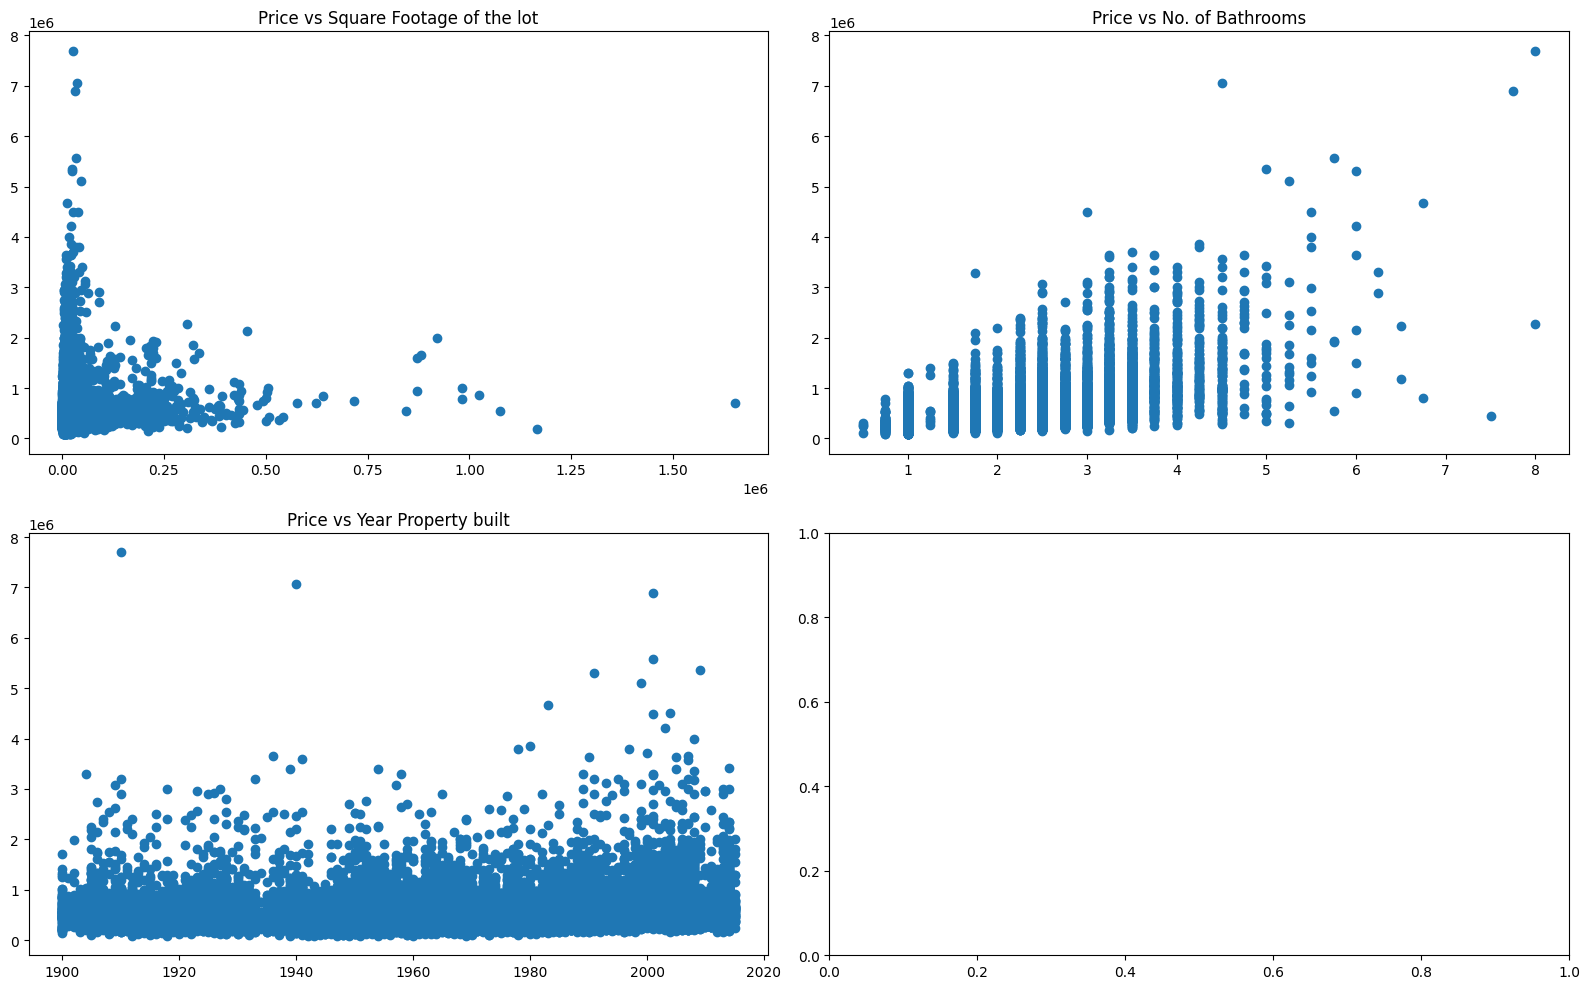

In [122]:
# Plotting scatter plots for 'price' vs 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15'

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Price vs Square Footage of the home
axs[0, 0].scatter(df['sqft_lot'], df['price'])
axs[0, 0].set_title('Price vs Square Footage of the lot')

# Price vs Grade
axs[0, 1].scatter(df['bathrooms'], df['price'])
axs[0, 1].set_title('Price vs No. of Bathrooms')

# Price vs Square footage apart from basement
axs[1, 0].scatter(df['yr_built'], df['price'])
axs[1, 0].set_title('Price vs Year Property built')


# Display the plot
plt.tight_layout()
plt.show()

In [129]:
# Defining Jacob's preferences
price = 1000000
bathrooms_min = 4
yr_built_max = 2023 - 50  # At least 50 years old
waterfront = 0  # No waterfront
big_lot = 10000  # Big enough to potentially accommodate a tennis court and a pool
distance_to_golf = 1500 # Distance to Golf Course in metres

In [124]:


# Filter the dataset based on the preferences
suitable_houses = df[(df['price'] >= price) & 
                     (df['bathrooms'] >= bathrooms_min) & 
                     (df['yr_built'] <= yr_built_max) & 
                     (df['waterfront'] != 1) &
                     (df['sqft_lot'] >= big_lot)]

# Total number of suitable houses
print('Number of Suitable Houses', suitable_houses.shape[0])
# Sort by price in ascending order and display the top 10 houses
suitable_houses.sort_values(by='price', ascending=True).head(10)

Number of Suitable Houses 21


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
4577,5460600110,6.000,4.000,5310.000,12741.000,2.000,0.000,3,10,3600.000,1710.000,1967,0.000,98040,47.570,-122.213,4190.000,12632.000,1050000.000
14926,3627800050,5.000,4.000,3760.000,22763.000,1.000,0.000,4,11,1910.000,1850.000,1969,0.000,98040,47.533,-122.220,3730.000,11201.000,1380000.000
5844,3585900500,4.000,4.250,4720.000,21000.000,3.000,0.000,5,11,4720.000,0.000,1971,0.000,98177,47.759,-122.376,3010.000,20000.000,1530000.000
15035,8924600020,4.000,4.500,5770.000,10050.000,1.000,0.000,5,9,3160.000,2610.000,1949,0.000,98115,47.677,-122.275,2950.000,6700.000,1540000.000
15578,5093300280,5.000,5.250,4830.000,18707.000,2.000,0.000,5,9,3930.000,900.000,1952,19980.000,98040,47.586,-122.247,2880.000,10520.000,1680000.000
15152,3304700130,4.000,4.000,3860.000,67953.000,2.000,0.000,4,12,3860.000,0.000,1927,0.000,98177,47.747,-122.378,4410.000,128066.000,1760000.000
17445,3625700010,5.000,4.000,4510.000,15175.000,2.000,0.000,3,10,4510.000,0.000,1969,20020.000,98040,47.531,-122.228,3510.000,13500.000,1870000.000
17665,3585901085,6.000,4.500,3810.000,28176.000,1.000,0.000,5,10,3810.000,0.000,1969,0.000,98177,47.761,-122.381,3810.000,26400.000,2010000.000
14172,1333300145,3.000,4.000,4200.000,30120.000,2.000,0.000,4,11,3600.000,600.000,1933,0.000,98112,47.638,-122.311,2760.000,12200.000,2230000.000
5697,1118002000,5.000,4.750,6390.000,13180.000,2.000,0.000,3,10,4560.000,1830.000,1940,0.000,98112,47.631,-122.291,4010.000,8137.000,2470000.000


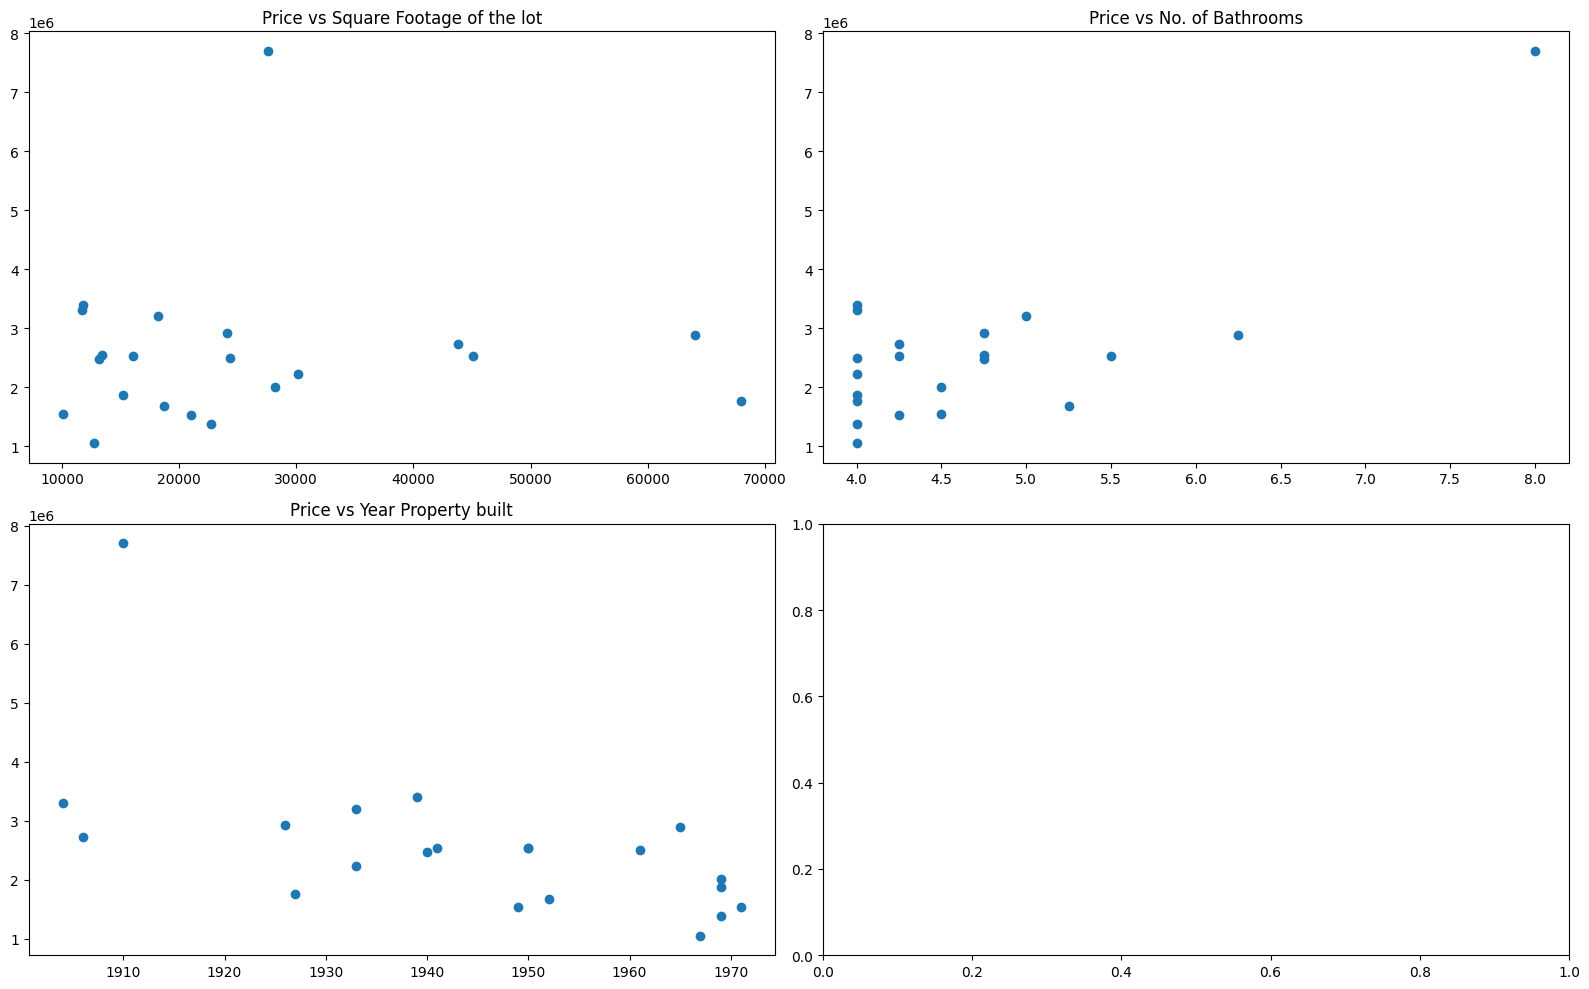

In [125]:
# Plotting scatter plots for 'price' vs 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15'

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Price vs Square Footage of the home
axs[0, 0].scatter(suitable_houses['sqft_lot'], suitable_houses['price'])
axs[0, 0].set_title('Price vs Square Footage of the lot')

# Price vs Grade
axs[0, 1].scatter(suitable_houses['bathrooms'], suitable_houses['price'])
axs[0, 1].set_title('Price vs No. of Bathrooms')

# Price vs Square footage apart from basement
axs[1, 0].scatter(suitable_houses['yr_built'], suitable_houses['price'])
axs[1, 0].set_title('Price vs Year Property built')


# Display the plot
plt.tight_layout()
plt.show()

In [130]:


# Create a Map With Central point & zoom at Seattle
m = folium.Map(location=[47.5, -122.2], zoom_start=10)

# Set a marker radius to visualise proximity to Golf courses
radius = distance_to_golf  # Radius in Metres

# Add Points on map for all locations in the suitable housese dataframe
for idx, row in suitable_houses.iterrows():
    # Set Marker Colour for Unknown WaterFront
    if row['waterfront'] == 2:
        marker_color = 'red'
    # Set Marker Colour for NON Waterfront
    else:
        marker_color = 'blue'
    folium.Marker([row['lat'], row['long']], 
                  popup=f"House ID: {row['id']}",
                  icon=folium.Icon(color=marker_color))
    
    
    # Create the marker
    marker = folium.Marker([row['lat'], row['long']], 
                           popup= f"House ID: {row['id']}", 
                           icon=folium.Icon(color=marker_color))    
    
    # Add the marker to the map
    marker.add_to(m)
    
    # Create a circle around the marker
    folium.Circle(location=[row['lat'], row['long']],
                  radius=radius,
                  color=marker_color,
                  fill=True,
                  fill_opacity=0.1).add_to(m)    
    
    
    


# Show the map
m

